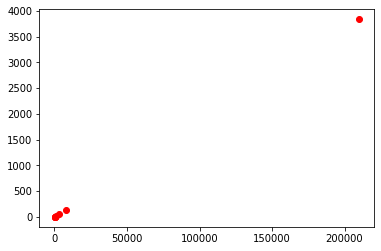

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

# i = np.arange(5, 20, 5)
# size_len = i**3

i       = np.array([5, 6, 7, 8, 10, 15, 210000**(1/3), 20])
time_np = np.array([1.03, 2.07, 3.76, 5.98, 12.50, 52.03, 64*60, 133.29]) # just in numpy array and on cpu, no parallel
volexs  = i**3
time_taichi = np.array([])


fig = plt.figure()
ax = fig.gca()
ax.plot(volexs, time_np, 'ro')
plt.show()

C:\Users\Shibo\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


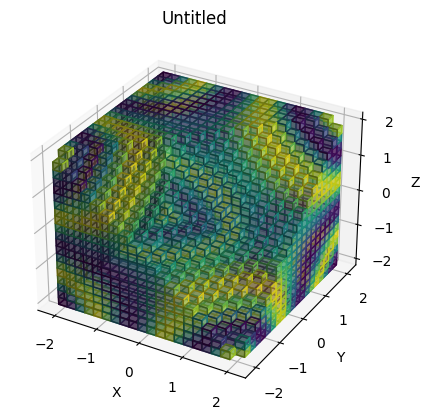

In [1]:
"""3D surface plot example."""
import numpy as np
import matplotlib.cm

from Stoner import Data

x, y, z = np.meshgrid(
    np.linspace(-2, 2, 21), np.linspace(-2, 2, 21), np.linspace(-2, 2, 21)
)
x = x.ravel()
y = y.ravel()
z = z.ravel()
u = np.sin(x * y * z)

p = Data(x, y, z, u, setas="xyzu", column_headers=["X", "Y", "Z"])

p.plot_voxels(cmap=matplotlib.cm.jet, visible=lambda x, y, z: x - y + z < 2.0)
p.title = "Voxel plot"
p.show()


In [24]:
import numpy as np 

a = np.random.rand(5,5).flatten()
a.reshape(5,5)


array([[0.1460959 , 0.90572671, 0.60390637, 0.27074322, 0.70350647],
       [0.42932128, 0.38176501, 0.33055762, 0.27225686, 0.57409157],
       [0.01682635, 0.82747628, 0.40657559, 0.97623357, 0.17381713],
       [0.45178799, 0.12927303, 0.92076909, 0.1363231 , 0.02549913],
       [0.6438248 , 0.81897017, 0.40572688, 0.80737337, 0.96319218]])

In [9]:
import numpy as np   
from multiprocessing import shared_memory

a = np.random.randint(0,2, size = (5,5), dtype = np.int64)
shm = shared_memory.SharedMemory(create=True, size = a.nbytes)
b = np.ndarray(a.shape, dtype=a.dtype, buffer=shm.buf)
b[:] = a[:]  # Copy the original data into shared memory
shm.name

'wnsm_01505963'

In [23]:
existing_shm = shared_memory.SharedMemory(name=shm.name)
c = np.ndarray((5,5), dtype=np.int64, buffer=existing_shm.buf)
c

FileNotFoundError: [WinError 2] 系统找不到指定的文件。: 'wnsm_01505963'

In [24]:
existing_shm.close()
shm.close()
shm.unlink()